# Display Demand

## Transition Matrix

Create a Rectbin Graph to the probability of changes in Demand

#### Input Variables:

$\mathbb{D}$ Demand Shocks  
$\mathbb{\Pi}_D$ Transition Matrix  
  
$C$ Array with Colours used in Rectbin Graph

#### Output Variables:

$\text{Rect}$ Rectbin Graph with Transition Matrix

### Function:

In [1]:
function Demand(D::Array{Float64,1},Π=Array{Float64,2};colour=["white","gray","black"])
    
    """Create a Rectbin Graph to the 
    probability of changes in Demand

    Parameters
    ----------
    D : Demand Shocks
    Π : Transition Matrix
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Rect: Rectbin Graph with Transition Matrix

    """
    
    N=length(D);

    x=repeat(D,inner=[N])
    y=repeat(D,outer=[N])

    Rect=plot(x=x, y=y, color=Π[:],
    Scale.ContinuousColorScale(Scale.lab_gradient(color(colour[1]),color(colour[2]),color(colour[3]))),
    Guide.ylabel("D Today"),
    Guide.xlabel("D Tomorrow"),
    Guide.title("Markov Matrix"),
    Guide.xticks(ticks=D),
    Guide.yticks(ticks=D),
    Geom.rectbin)
    
    return Rect
    
end

Demand (generic function with 2 methods)

## Stationary Distribution

Create a Line Graph with the Stationary Distribution of Demand

#### Input Variables:

$\mathbb{D}$ Demand Shocks  
$\mathbb{\Pi}_D$ Transition Matrix  
  
$C$ Array with Colours used in Line Graph

#### Output Variables:

$\text{Line}$ Line Graph with Stationary Distribution

### Function:

In [2]:
function StationaryDemand(D::Array{Float64,1},Π=Array{Float64,2};colour=["white","gray","black"])
    
    """Create a Line Graph with the 
    Stationary Distribution of Demand

    Parameters
    ----------
    D : Demand Shocks
    Π : Transition Matrix
    colour: Array with Colours used in Rectbin Graph
    
    Output
    ----------
    Line: Line Graph with Stationary Distribution

    """
    
    p=fill(1/length(D),length(D));

    test=1;

    while test>=eps(Float32)
    
        p1=Π'*p;
    
        test=norm(p1-p);
    
        p=p1;
    
    end

    Line=plot(x=D, y=p,
    Theme(panel_fill=color(colour[1]),panel_opacity=0.5,
    panel_stroke=color("white"),default_color=color(colour[3])),
    Guide.ylabel("Probability Density Function"),
    Guide.xlabel("Demand"),
    Guide.title("PDF of Demand"),
    Geom.smooth(method=:loess,smoothing=0.4))
    
    return Line
    
end

StationaryDemand (generic function with 2 methods)

## Example

### Parameters:

In [3]:
import LabourDP

# Create Demand Shock

M=10.;
m=0.;
ρ=0.8;
N=11;

d=2.;

DemandMarkov=LabourDP.Demand(M,m,ρ,N,d);

#### Markov Matrix:

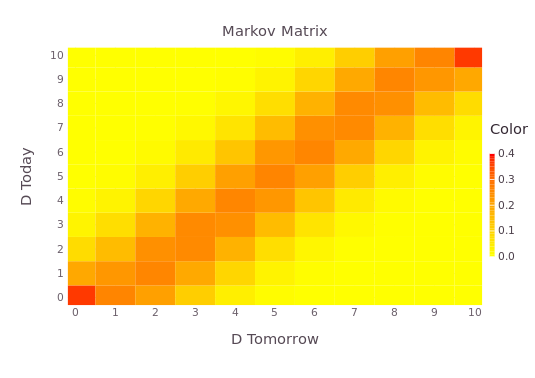

In [4]:
using Gadfly
using Color

Demand(DemandMarkov[1],DemandMarkov[2],colour=["yellow","orange","red"])

### Stationary Distribution:

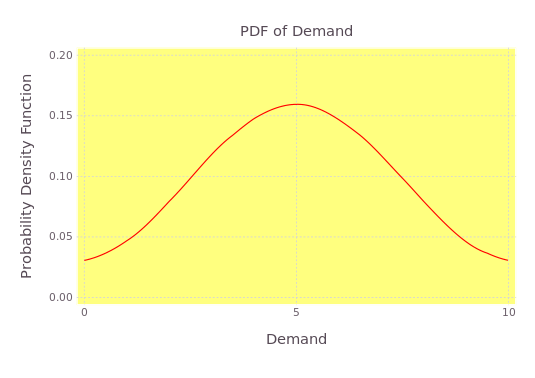

In [5]:
StationaryDemand(DemandMarkov[1],DemandMarkov[2],colour=["yellow","orange","red"])